<h2>20156025_sungho Park<h2>

In [1]:
import numpy as np
from matplotlib import pyplot as plt  
import matplotlib.pylab as plt
import matplotlib as mpl
import random

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

In [2]:
group_num = np.zeros(num_image,dtype = 'int') #데이터가 어디그룹인지 표시
energy = []
accuracy = []

#그룹에서 10개의 숫자중에 가장 많은 값 반환
def max(temp):
    max = temp[0]
    max_num = 0
    for i in range(10):
        if temp[i] > max:
            max = temp[i] 
            max_num = i
    return max_num


#가장 작은 distance를 가지는 centeroid가 무엇인지 찾아주는 func
def min_dst(temp2,k,x):
    min = temp2[0]
    for i in range(k):
        if temp2[i] < min:
            min = temp2[i] #centeroid[i] 와의 distance가 가장 작다.
            group_num[x] = i  #즉 x번째 데이터는 i 그룹이다.
    return min

# k- means traning energy on the training dataset
def k_means1(k,iteration):
    centeroid = np.zeros((size_row*size_col,k),dtype = 'float') 
    group_count = np.zeros(k,dtype = 'int') #각 그룹이 몇개인지 저장할 array
    temp = np.zeros((size_row*size_col,k),dtype = 'float') # avg를 계산하기위한 [k,data_set차원]배열
    cent_label = np.zeros(k,dtype = 'int') #cent의 중심점을 저장할 arr
    
    #1. 처음에 랜덤한 중심점 지정
    if iteration == 0: #평균점 생성
        #for x in range(size_row*size_col):               
        #    for y in range(k):                           #28*28*k
        #        c = random.randrange(1,255)
        #        d = random.randrange(0,c)
        #        centeroid[x][y] = d/c * 10
        
        #From the front, arbitrary centroids
        for i in range(k):
            for j in range(28*28):
                centeroid[j][i]=list_image[j][i]
                
    #2. 두번째 iteration 부터는 각 그룹의 평균값을 중심점으로 지정
    else: 
        #각 그룹이 몇개인지 확인(평균 계산 위헤서 필요)
        for y in range(num_image): #data_set 갯수                        
            group_count[group_num[y]] +=1
            temp[:,group_num[y]] = temp[:,group_num[y]] + list_image[:,y]

        #평균 계산    
        for j in range (k):                                           
            if group_count[j] != 0: 
                temp[:,j] = temp[:,j]/group_count[j]
            centeroid[:,j] = temp[:,j]#중심점으로 지정         
        #print(group_count)
        
    temp2 = np.full(k,1000,dtype = 'float')
    temp3 = np.zeros(num_image,dtype = 'float')
    
    

    
    #1-3. (Energy) 각 데이터와 중심점들의 distance 계산 = energy
    for x in range(num_image): 
        for i in range(k): 
            temp2[i] = distance(list_image[:,x],centeroid[:,i])

        temp3[x] = min_dst(temp2,k,x)             
    
    #각그룹에 각 label이 몇개있는지 저장
    group_major = np.zeros((k,10),dtype = 'int') 
    #각그룹에 가장 많은 label이 무엇인지 저장
    major = np.zeros(k,dtype = 'int')
    for i in range(num_image):
        group_major[group_num[i]][list_label[i]] +=1
    for j in range(k):
        major[j] = max(group_major[j])
    
    acc = 0
    #accuracy
    for i in range(k):
        acc += group_major[i][major[i]]
    
    energy.append(np.sum(temp3))
    accuracy.append(acc/num_image)
    
    return centeroid
        
#energy Plot
def plot_e():
    mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
    plt.plot(energy,'bo-')
    plt.xlabel('iteration')
    plt.ylabel('energy')
    plt.legend() #범례
    plt.show()
    
#accuracy Plot
def plot_a():
    mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
    plt.plot(accuracy,'ro-')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.legend() #범례
    plt.show()
    
    
#energy Pop
def pop_e():
    for i in range(len(energy)):
        energy.pop()
    for i in range(len(accuracy)):  
        accuracy.pop()

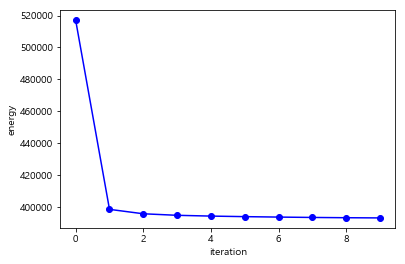

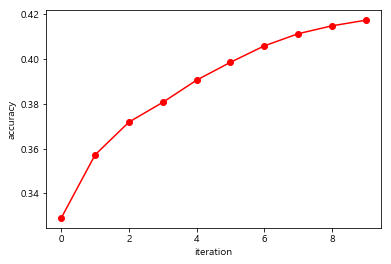

In [3]:
#(Traning, K = 5) 
cent5 = np.zeros((size_row*size_col,5),dtype = 'float')
pop_e()
for i in range(10):
    k_means1(5,i)
plot_e()
plot_a()

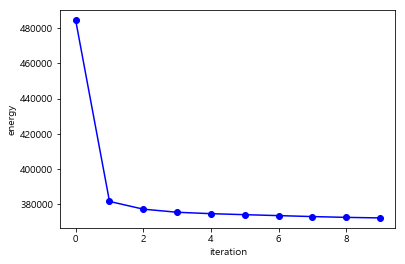

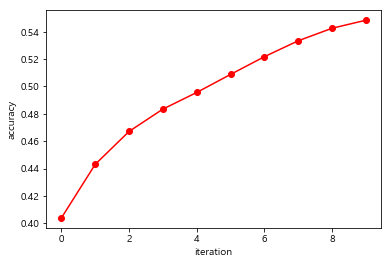

In [4]:
#(Traning, K = 10) 
cent10 = np.zeros((size_row*size_col,10),dtype = 'float')
pop_e()
for i in range(10):
    k_means1(10,i)
plot_e()
plot_a()

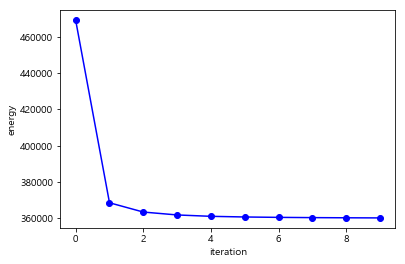

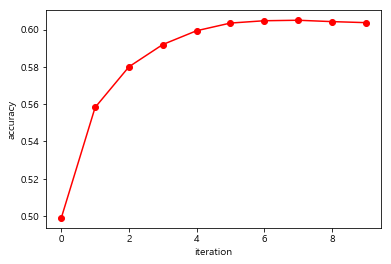

In [5]:
#(Traning, K = 15) 
cent15 = np.zeros((size_row*size_col,15),dtype = 'float')
pop_e()
for i in range(10):
    cent = k_means1(15,i)
plot_e()
plot_a()

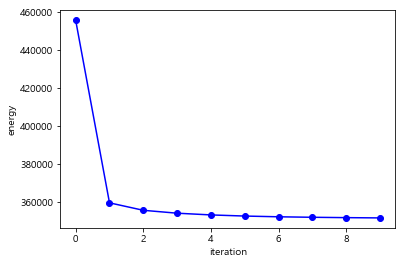

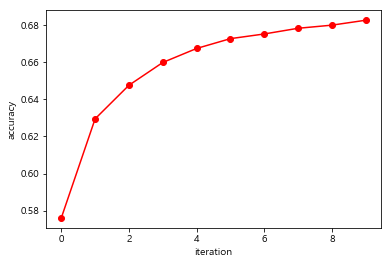

In [6]:
#(Traning, K = 20) 
cent20 = np.zeros((size_row*size_col,20),dtype = 'float')
pop_e()
for i in range(10):
    cent = k_means1(20,i)
plot_e()
plot_a()

In [7]:
file_data2		= "mnist_test.csv"
handle_file2	= open(file_data2, "r")
data2        		= handle_file2.readlines()
handle_file2.close()

num_image2	= len(data2)
count2       	= 0     # count for the number of images

list_image2  = np.empty((size_row * size_col, num_image2), dtype=float)
list_label2  = np.empty(num_image2, dtype=int)

for line in data2:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label2[count2]       = label
    list_image2[:, count2]    = im_vector    

    count2 += 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [26]:
# k- means traning accuracy on the training dataset
group_num2 = np.zeros(num_image2,dtype = 'int') #데이터가 어디그룹인지 표시

#가장 작은 distance를 가지는 centeroid가 무엇인지 찾아주는 func
def min_dst2(temp2,k,x):
    min = temp2[0]
    for i in range(k):
        if temp2[i] < min:
            min = temp2[i] #centeroid[i] 와의 distance가 가장 작다.
            group_num2[x] = i  #즉 x번째 데이터는 i 그룹이다.
    return min

def k_means2(k,iteration,centeroid):
    temp2 = np.full(k,1000,dtype = 'float')
    temp3 = np.zeros(num_image2,dtype = 'float')
    
    #1-3. (Energy) 각 데이터와 중심점들의 distance 계산 = energy
    for x in range(num_image2): 
        for i in range(k): 
            temp2[i] = distance(list_image2[:,x],centeroid[:,i])

        temp3[x] = min_dst2(temp2,k,x)             
    
    #각그룹에 각 label이 몇개있는지 저장
    group_major = np.zeros((k,10),dtype = 'int') 
    #각그룹에 가장 많은 label이 무엇인지 저장
    major = np.zeros(k,dtype = 'int')
    for i in range(num_image2):
        group_major[group_num2[i]][list_label2[i]] +=1
    for j in range(k):
        major[j] = max(group_major[j])
    
    acc = 0
    #accuracy
    for i in range(k):
        acc += group_major[i][major[i]]
    
    accuracy.append(acc/num_image2)

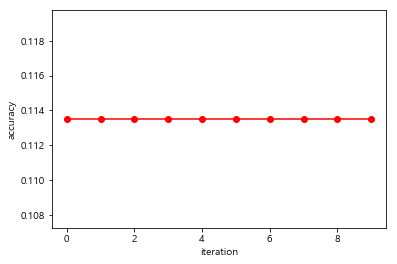

In [27]:
#(Testing, K = 5) 
pop_e()
for i in range(10):
    k_means2(5,i,cent5)
plot_a()

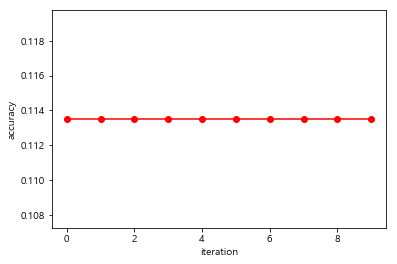

In [23]:
#(Testing, K = 10) 
pop_e()
for i in range(10):
    k_means2(10,i,cent10)
plot_a()

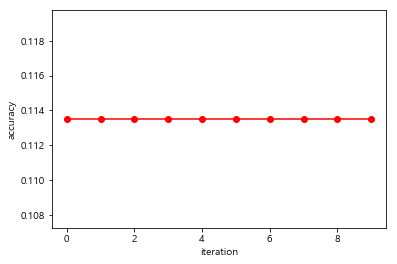

In [24]:
#(Testing, K = 15) 
pop_e()
for i in range(10):
    k_means2(15,i,cent15)
plot_a()

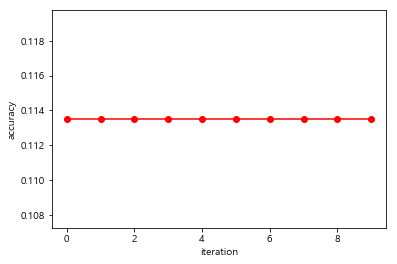

In [25]:
#(Testing, K = 20) 
pop_e()
for i in range(10):
    k_means2(20,i,cent20)
plot_a()